### Problem Statement: To Predict how likely individuals are to receive their H1N1 and Seasonal Flu Vaccines.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import io
%cd "C:\Users\saich\Downloads"

C:\Users\saich\Downloads


In [3]:
vaccinetrain = pd.read_csv("training_set_features.csv")
vaccinetest = pd.read_csv("test_set_features.csv")
vaccinelabels = pd.read_csv("training_set_labels.csv")

In [4]:
print(vaccinetrain.shape)
print(vaccinetest.shape)
print(vaccinelabels.shape)


(26707, 36)
(26708, 36)
(26707, 3)


In [490]:
vaccinetrain.isnull().sum().sort_values(ascending=False)

employment_occupation          13470
employment_industry            13330
health_insurance               12274
income_poverty                  4423
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
rent_or_own                     2042
employment_status               1463
marital_status                  1408
education                       1407
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
opinion_seas_sick_from_vacc      537
opinion_seas_risk                514
opinion_seas_vacc_effective      462
opinion_h1n1_sick_from_vacc      395
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
household_children               249
household_adults                 249
behavioral_avoidance             208
behavioral_touch_face            128
h1n1_knowledge                   116
h1n1_concern                      92
behavioral_large_gatherings       87
behavioral_outside_home           82
b

In [491]:
vaccinetest.isnull().sum().sort_values(ascending=False)

employment_occupation          13426
employment_industry            13275
health_insurance               12228
income_poverty                  4497
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
rent_or_own                     2036
employment_status               1471
marital_status                  1442
education                       1407
chronic_med_condition            932
child_under_6_months             813
health_worker                    789
opinion_seas_sick_from_vacc      521
opinion_seas_risk                499
opinion_seas_vacc_effective      452
opinion_h1n1_vacc_effective      398
opinion_h1n1_risk                380
opinion_h1n1_sick_from_vacc      375
household_children               225
household_adults                 225
behavioral_avoidance             213
behavioral_touch_face            128
h1n1_knowledge                   122
h1n1_concern                      85
behavioral_outside_home           82
behavioral_antiviral_meds         79
b

In [6]:
# Since there are missing values in both Train and Test Set Im combining both the Datasets
combinedf = pd.concat([vaccinetrain,vaccinetest],axis=0) # Row Concatenation 

In [492]:
# info() method shows some of the characteristics of the data such as Column Name, No. of non-null values of our columns, 
#Dtype of the data, and Memory Usage.
combinedf.info()
# Many Variables have Null Values 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53415 entries, 0 to 26707
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                53415 non-null  int64  
 1   h1n1_concern                 53238 non-null  float64
 2   h1n1_knowledge               53177 non-null  float64
 3   behavioral_antiviral_meds    53265 non-null  float64
 4   behavioral_avoidance         52994 non-null  float64
 5   behavioral_face_mask         53377 non-null  float64
 6   behavioral_wash_hands        53333 non-null  float64
 7   behavioral_large_gatherings  53256 non-null  float64
 8   behavioral_outside_home      53251 non-null  float64
 9   behavioral_touch_face        53159 non-null  float64
 10  doctor_recc_h1n1             49095 non-null  float64
 11  doctor_recc_seasonal         49095 non-null  float64
 12  chronic_med_condition        51512 non-null  float64
 13  child_under_6_mo

### Missing Value Imputation: Strategy (KNN Imputer)
* KNN is a non parametric algorithm that uses distance like Euclidean to calculate distance between missing value and closest 5 neighbors(rows) and smallest distance value is imputed.
* Before applying KNN imputer labelencoding of data must be done

In [5]:
from sklearn.preprocessing import LabelEncoder

In [7]:
stringcols=combinedf.drop(['respondent_id'],axis=1)

In [8]:
stringcols=stringcols.astype(str).apply(lambda series:pd.Series(
LabelEncoder().fit_transform(series[series.notnull()]),index = series[series.notnull()].index))

In [9]:
from sklearn.impute import KNNImputer

In [10]:
imputer = KNNImputer()

In [11]:
stringcolsimp = imputer.fit_transform(stringcols)

In [13]:
stringcolsimp = pd.DataFrame(stringcolsimp,columns=stringcols.columns)

In [493]:
stringcolsimp.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,2.0,1.0,0.0,1.0,8.0,2.0,0.0,0.0,10.0,11.0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,2.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,13.0,20.0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,1.0,0.0,0.0,9.0,0.0,2.0,0.0,15.0,22.0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,2.0,1.0,1.0,1.0,5.0,1.0,0.0,0.0,10.0,11.0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,9.0,0.0,1.0,0.0,19.0,5.0


### Splitting back the data to Train data and Test data

In [17]:
vaccinetraindf = stringcolsimp.loc[0:26706]

In [18]:
vaccinetestdf = stringcolsimp.loc[26708:53415]

In [19]:
vaccinetraindf.shape

(26707, 35)

In [20]:
vaccinetestdf.shape

(26707, 35)

### Hypothesis Testing:
### a.) Seasonal Vaccine

In [495]:
from scipy.stats import chi2_contingency

In [496]:
# Null Hypothesis : There is Significance between seasonalvaccine and sex
pd.crosstab(vaccinelabels.seasonal_vaccine,vaccinetraindf.sex)

sex,0.0,1.0
seasonal_vaccine,,
0,7970,6302
1,7888,4547


In [497]:
chi2_contingency(pd.crosstab(vaccinelabels.seasonal_vaccine,vaccinetraindf.sex))
# Since p value < 0.05 reject null 

(158.40462897107128,
 2.5248076319253385e-36,
 1,
 array([[8474.38409406, 5797.61590594],
        [7383.61590594, 5051.38409406]]))

In [498]:
# Null Hypothesis : There is Significance between seasonalvaccine and income_poverty
pd.crosstab(vaccinelabels.seasonal_vaccine,vaccinetraindf.income_poverty)

income_poverty,0.0,1.0,2.0,3.0
seasonal_vaccine,,,,
0,6686,3427,1719,2440
1,6091,3383,978,1983


In [499]:
chi2_contingency(pd.crosstab(vaccinelabels.seasonal_vaccine,vaccinetraindf.income_poverty))
# Since p value < 0.05 reject null 

(153.17012658009583,
 5.455880245363045e-33,
 3,
 array([[6827.92316621, 3639.20769836, 1441.25450256, 2363.61463287],
        [5949.07683379, 3170.79230164, 1255.74549744, 2059.38536713]]))

In [500]:
# Null Hypothesis : There is Significance between seasonalvaccine and education
pd.crosstab(vaccinelabels.seasonal_vaccine,vaccinetraindf.education)

education,0.0,1.0,2.0,3.0,4.0
seasonal_vaccine,,,,,
0,3199,1415,4933,3860,865
1,2598,948,5164,3183,542


In [501]:
chi2_contingency(pd.crosstab(vaccinelabels.seasonal_vaccine,vaccinetraindf.education))
# Since p value < 0.05 reject null 

(173.57815735793127,
 1.7841137139002192e-36,
 4,
 array([[3097.86887333, 1262.76766391, 5395.7533231 , 3763.72097203,
          751.88916763],
        [2699.13112667, 1100.23233609, 4701.2466769 , 3279.27902797,
          655.11083237]]))

In [502]:
# Null Hypothesis : There is Significance between seasonalvaccine and doctor_recc_seasonal
pd.crosstab(vaccinelabels.seasonal_vaccine,vaccinetraindf.doctor_recc_seasonal)

doctor_recc_seasonal,0.0,1.0,2.0
seasonal_vaccine,,,
0,10756,2117,1399
1,5697,5977,761


In [503]:
chi2_contingency(pd.crosstab(vaccinelabels.seasonal_vaccine,vaccinetraindf.doctor_recc_seasonal))
# Since p value < 0.05 reject null 

(3474.902794649153,
 0.0,
 2,
 array([[8792.3471749 , 4325.36668289, 1154.28614221],
        [7660.6528251 , 3768.63331711, 1005.71385779]]))

In [504]:
# Null Hypothesis : There is Significance between seasonalvaccine and behavioral_face_mask
pd.crosstab(vaccinelabels.seasonal_vaccine,vaccinetraindf.behavioral_face_mask)

behavioral_face_mask,0.0,1.0,2.0
seasonal_vaccine,,,
0,13449,815,8
1,11398,1026,11


In [505]:
chi2_contingency(pd.crosstab(vaccinelabels.seasonal_vaccine,vaccinetraindf.behavioral_face_mask))
# Since p value < 0.05 reject null 

(67.92302367431634,
 1.7811595018273916e-15,
 2,
 array([[1.32780314e+04, 9.83815180e+02, 1.01534429e+01],
        [1.15689686e+04, 8.57184820e+02, 8.84655708e+00]]))

###  b.) H1N1_ Vaccine

In [506]:
# Null Hypothesis : There is no significance between h1n1vaccine and sex
pd.crosstab(vaccinelabels.h1n1_vaccine,vaccinetraindf.sex)

sex,0.0,1.0
h1n1_vaccine,,
0,12378,8655
1,3480,2194


In [507]:
chi2_contingency(pd.crosstab(vaccinelabels.h1n1_vaccine,vaccinetraindf.sex))
# Since p value < 0.05 reject null 

(11.309981152455997,
 0.0007709155489949327,
 1,
 array([[12488.90979893,  8544.09020107],
        [ 3369.09020107,  2304.90979893]]))

In [508]:
# Null Hypothesis : There is no significance between seasonalvaccine and income_poverty
pd.crosstab(vaccinelabels.h1n1_vaccine,vaccinetraindf.income_poverty)

income_poverty,0.0,1.0,2.0,3.0
h1n1_vaccine,,,,
0,10178,5087,2181,3587
1,2599,1723,516,836


In [509]:
chi2_contingency(pd.crosstab(vaccinelabels.h1n1_vaccine,vaccinetraindf.income_poverty))
# Since p value < 0.05 reject null 

(94.91226392182662,
 1.9282818704757377e-20,
 3,
 array([[10062.4795372 ,  5363.19054929,  2124.01246864,  3483.31744486],
        [ 2714.5204628 ,  1446.80945071,   572.98753136,   939.68255514]]))

In [510]:
# Null Hypothesis : There is no significance between h1n1_vaccine and education
pd.crosstab(vaccinelabels.h1n1_vaccine,vaccinetraindf.education)

education,0.0,1.0,2.0,3.0,4.0
h1n1_vaccine,,,,,
0,4726,1968,7614,5579,1146
1,1071,395,2483,1464,261


In [511]:
chi2_contingency(pd.crosstab(vaccinelabels.h1n1_vaccine,vaccinetraindf.education))
# Since p value < 0.05 reject null 

(130.12342530584624,
 3.66443514946588e-27,
 4,
 array([[4565.40611076, 1860.97199236, 7951.85535627, 5546.68884562,
         1108.07769499],
        [1231.59388924,  502.02800764, 2145.14464373, 1496.31115438,
          298.92230501]]))

In [512]:
# Null Hypothesis : There is no significance between h1n1_vaccine and doctor_recc_seasonal
pd.crosstab(vaccinelabels.h1n1_vaccine,vaccinetraindf.doctor_recc_seasonal)

doctor_recc_seasonal,0.0,1.0,2.0
h1n1_vaccine,,,
0,13783,5275,1975
1,2670,2819,185


In [513]:
chi2_contingency(pd.crosstab(vaccinelabels.h1n1_vaccine,vaccinetraindf.doctor_recc_seasonal))
# Since p value < 0.05 reject null 

(1347.6234370031846,
 2.329639991754564e-293,
 2,
 array([[12957.49986895,  6374.40004493,  1701.10008612],
        [ 3495.50013105,  1719.59995507,   458.89991388]]))

In [514]:
# Null Hypothesis : There is no significance between h1n1_vaccine and behavioral_face_mask
pd.crosstab(vaccinelabels.h1n1_vaccine,vaccinetraindf.behavioral_face_mask)

behavioral_face_mask,0.0,1.0,2.0
h1n1_vaccine,,,
0,19765,1255,13
1,5082,586,6


In [515]:
chi2_contingency(pd.crosstab(vaccinelabels.h1n1_vaccine,vaccinetraindf.behavioral_face_mask))
# Since p value < 0.05 reject null 

(133.81661811498145,
 8.751662937660443e-30,
 2,
 array([[1.95681638e+04, 1.44987280e+03, 1.49633804e+01],
        [5.27883619e+03, 3.91127195e+02, 4.03661961e+00]]))

In [21]:
y1 = vaccinelabels.h1n1_vaccine 
y  = vaccinelabels.seasonal_vaccine
X  = vaccinetraindf

<AxesSubplot:ylabel='Frequency'>

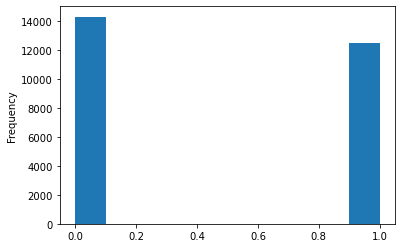

In [516]:
vaccinelabels.seasonal_vaccine.plot(kind='hist')
# Balanced Data

<AxesSubplot:ylabel='Frequency'>

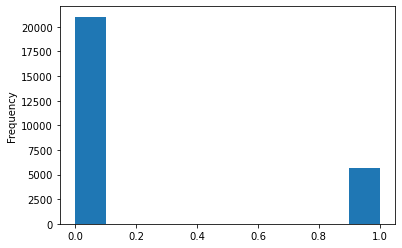

In [517]:
vaccinelabels.h1n1_vaccine.plot(kind='hist')
# Imbalance Data

## Model Building and Idealogy : 
* As there are two binary variables to target, Let's create a classification model for each variable separately.
* The variable seasonal vaccine is balanced, whereas the h1n1 vaccine variable is not.
* Let's use SMOTE to balance the h1n1 vaccine variable.

In [22]:
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import plot_roc_curve

### Logistic Regression for Seasonal Vaccine 

In [23]:
from sklearn.linear_model import LogisticRegression

In [35]:
logit = LogisticRegression(max_iter=300)

In [36]:
logitmodel= logit.fit(X,y)

In [37]:
logitmodel.score(X,y)

0.7611487624967237

In [38]:
cross_val_score(logitmodel,X,y)

array([0.75739423, 0.759079  , 0.76427635, 0.76671035, 0.75360419])

In [28]:
np.mean([0.75739423, 0.759079  , 0.76427635, 0.76671035, 0.75360419])

0.760212824

In [39]:
logitpredict = logitmodel.predict(X)

In [522]:
logitpredict_test = logitmodel.predict_proba(vaccinetestdf)

In [525]:
pd.DataFrame(logitpredict_test).to_csv("seaslog.csv")

In [40]:
print(classification_report(y,logitpredict))

              precision    recall  f1-score   support

           0       0.77      0.79      0.78     14272
           1       0.75      0.73      0.74     12435

    accuracy                           0.76     26707
   macro avg       0.76      0.76      0.76     26707
weighted avg       0.76      0.76      0.76     26707



In [41]:
pd.crosstab(y,logitpredict)

col_0,0,1
seasonal_vaccine,,
0,11278,2994
1,3385,9050


C:\Users\saich\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


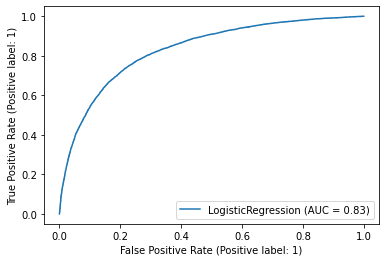

In [42]:
plot_roc_curve(logitmodel,X,y)

### Decision Tree Classification for Seasonal Vaccine 

In [43]:
from sklearn.tree import DecisionTreeClassifier

In [44]:
tree = DecisionTreeClassifier(max_depth=16)

In [45]:
treemodel = tree.fit(X,y)

In [46]:
treemodel.score(X,y)

0.9405399333508069

In [47]:
cross_val_score(treemodel,X,y)

array([0.6963684 , 0.70647697, 0.70642202, 0.71241341, 0.69668601])

In [48]:
np.mean([0.6963684 , 0.70647697, 0.70642202, 0.71241341, 0.69668601])

0.7036733620000001

In [49]:
treepredict = treemodel.predict(X)

In [553]:
treepredict_test = treemodel.predict(vaccinetestdf)

In [554]:
pd.DataFrame(treepredict_test).to_csv("seastree.csv")

In [50]:
print(classification_report(y,treepredict))

              precision    recall  f1-score   support

           0       0.94      0.95      0.94     14272
           1       0.94      0.93      0.94     12435

    accuracy                           0.94     26707
   macro avg       0.94      0.94      0.94     26707
weighted avg       0.94      0.94      0.94     26707



In [51]:
pd.crosstab(y,treepredict)

col_0,0,1
seasonal_vaccine,,
0,13507,765
1,823,11612


C:\Users\saich\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


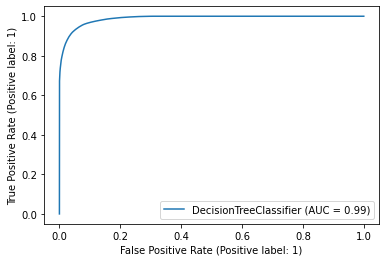

In [52]:
plot_roc_curve(treemodel,X,y)

### Random Forest Classification for Seasonal Vaccine 

In [60]:
from sklearn.ensemble import RandomForestClassifier

In [69]:
RF = RandomForestClassifier(n_estimators=3)

In [70]:
RFmodel = RF.fit(X,y)

In [71]:
RFmodel.score(X,y)

0.9460815516531247

In [72]:
cross_val_score(RFmodel,X,y)

array([0.70497941, 0.70778735, 0.71316233, 0.72477064, 0.71035387])

In [73]:
np.mean([0.70497941, 0.70778735, 0.71316233, 0.72477064, 0.71035387])

0.7122107200000001

In [74]:
RFpredict = RFmodel.predict(X)

In [528]:
RFpredict_test = RFmodel.predict_proba(vaccinetestdf)

In [529]:
pd.DataFrame(RFpredict_test).to_csv('RFseas.csv')

In [75]:
print(classification_report(y,RFpredict))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95     14272
           1       0.95      0.94      0.94     12435

    accuracy                           0.95     26707
   macro avg       0.95      0.95      0.95     26707
weighted avg       0.95      0.95      0.95     26707



In [76]:
pd.crosstab(y,RFpredict)

col_0,0,1
seasonal_vaccine,,
0,13593,679
1,761,11674


C:\Users\saich\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


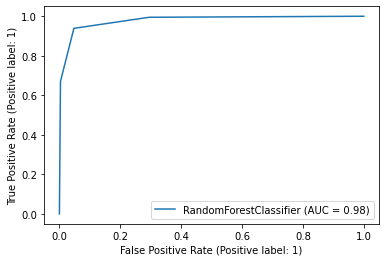

In [77]:
plot_roc_curve(RFmodel,X,y)

### Gradient Boosting Classification  for Seasonal Vaccine 

In [78]:
from sklearn.ensemble import GradientBoostingClassifier

In [135]:
gbm= GradientBoostingClassifier(n_estimators=4000)

In [136]:
gbmmodel = gbm.fit(X,y)

In [137]:
gbmmodel.score(X,y)

0.8566667914778897

In [138]:
cross_val_score(gbmmodel,X,y) 

array([0.77031075, 0.77162112, 0.7760719 , 0.78187605, 0.77831867])

In [139]:
np.mean([0.77405466, 0.77461625, 0.77925482, 0.78674406, 0.78468452])

0.7798708619999999

In [140]:
gbmpredict = gbmmodel.predict(X)

In [530]:
gbmpredict_test = gbmmodel.predict_proba(vaccinetestdf)

In [531]:
pd.DataFrame(gbmpredict_test).to_csv('gbmseas.csv')

In [141]:
print(classification_report(y,gbmpredict))

              precision    recall  f1-score   support

           0       0.86      0.87      0.87     14272
           1       0.85      0.84      0.84     12435

    accuracy                           0.86     26707
   macro avg       0.86      0.86      0.86     26707
weighted avg       0.86      0.86      0.86     26707



In [142]:
pd.crosstab(y,gbmpredict)

col_0,0,1
seasonal_vaccine,,
0,12460,1812
1,2016,10419


C:\Users\saich\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


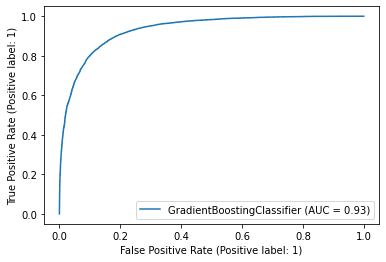

In [143]:
plot_roc_curve(gbmmodel,X,y)

### Support Vector Machine Classification for Seasonal Vaccine 

In [159]:
from sklearn.svm import SVC

In [160]:
svm = SVC()

In [161]:
svmmodel = svm.fit(X,y)

In [163]:
svmmodel.score(X,y)

0.7783352679072902

In [165]:
cross_val_score(svmmodel,X,y)

array([0.76843879, 0.76506926, 0.77682082, 0.77625913, 0.77195282])

In [518]:
np.mean([0.76843879, 0.76506926, 0.77682082, 0.77625913, 0.77195282])

0.7717081640000001

In [166]:
svmpredict = svmmodel.predict(X)

In [535]:
pd.DataFrame(svmpredict_test).to_csv('svmseas.csv')

In [167]:
print(classification_report(y,svmpredict))

              precision    recall  f1-score   support

           0       0.78      0.81      0.80     14272
           1       0.77      0.74      0.76     12435

    accuracy                           0.78     26707
   macro avg       0.78      0.78      0.78     26707
weighted avg       0.78      0.78      0.78     26707



In [168]:
pd.crosstab(y,svmpredict)

col_0,0,1
seasonal_vaccine,,
0,11580,2692
1,3228,9207


C:\Users\saich\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


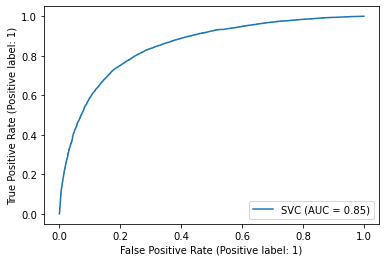

In [169]:
plot_roc_curve(svmmodel,X,y)

### Navie Bayes Classification for Seasonal Vaccine

In [144]:
from sklearn.naive_bayes import BernoulliNB

In [145]:
nb = BernoulliNB()

In [146]:
nbmodel = nb.fit(X,y)

In [147]:
nbmodel.score(X,y)

0.6936383719624069

In [148]:
cross_val_score(nbmodel,X,y)

array([0.68045676, 0.70423063, 0.69106909, 0.69855832, 0.68938401])

In [149]:
np.mean([0.68045676, 0.70423063, 0.69106909, 0.69855832, 0.68938401])

0.692739762

In [150]:
nbpredict = nbmodel.predict(X)

In [537]:
nbpredict_test = nbmodel.predict_proba(vaccinetestdf)

In [538]:
pd.DataFrame(nbpredict_test).to_csv('nbseas.csv')

In [151]:
print(classification_report(y,nbpredict))

              precision    recall  f1-score   support

           0       0.72      0.69      0.71     14272
           1       0.66      0.70      0.68     12435

    accuracy                           0.69     26707
   macro avg       0.69      0.69      0.69     26707
weighted avg       0.69      0.69      0.69     26707



In [152]:
pd.crosstab(y,nbpredict)

col_0,0,1
seasonal_vaccine,,
0,9878,4394
1,3788,8647


C:\Users\saich\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


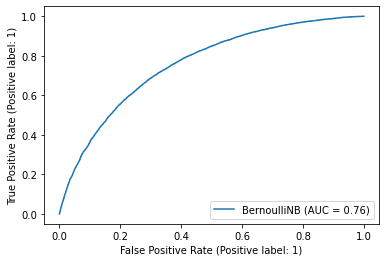

In [153]:
plot_roc_curve(nbmodel,X,y)

# Balancing the Imbalance data using Smote

In [174]:
from imblearn.over_sampling import SMOTE

In [175]:
smote = SMOTE(random_state=60)

In [176]:
X_smote,y_smote = smote.fit_resample(X,y1)

In [177]:
print(pd.DataFrame(y1).value_counts())
print(pd.DataFrame(y_smote).value_counts())

h1n1_vaccine
0               21033
1                5674
dtype: int64
h1n1_vaccine
0               21033
1               21033
dtype: int64


### Logistic Regression for H1N1 Vaccine

In [178]:
print(X_smote.shape)
print(y_smote.shape)

(42066, 35)
(42066,)


In [188]:
logit2 = LogisticRegression(max_iter=400)

In [189]:
logitmodel_smote = logit2.fit(X_smote,y_smote)

In [190]:
logitmodel_smote.score(X_smote,y_smote)

0.762943945228926

In [191]:
cross_val_score(logitmodel_smote,X_smote,y_smote)

array([0.75124792, 0.75692381, 0.76714608, 0.77011768, 0.76678949])

In [182]:
np.mean([0.75124792, 0.75692381, 0.76714608, 0.77011768, 0.76678949])

0.7624449959999999

In [192]:
logitsmote_predict = logitmodel_smote.predict(X_smote)

In [539]:
logitsmote_predict_test = logitmodel_smote.predict_proba(vaccinetestdf)

In [540]:
pd.DataFrame(logitsmote_predict_test).to_csv('h1n1log.csv')

In [193]:
print(classification_report(y_smote,logitsmote_predict))

              precision    recall  f1-score   support

           0       0.76      0.76      0.76     21033
           1       0.76      0.77      0.76     21033

    accuracy                           0.76     42066
   macro avg       0.76      0.76      0.76     42066
weighted avg       0.76      0.76      0.76     42066



In [194]:
pd.crosstab(y_smote,logitsmote_predict)

col_0,0,1
h1n1_vaccine,,
0,15990,5043
1,4929,16104


C:\Users\saich\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


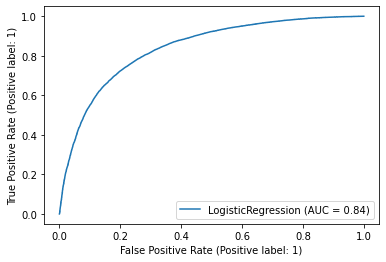

In [195]:
plot_roc_curve(logitmodel_smote,X_smote,y_smote)

### Decision Tree Classification for H1N1 Vaccine : 

In [230]:
treesmote = DecisionTreeClassifier(max_depth=11)

In [231]:
treemodel_smote = treesmote.fit(X_smote,y_smote)

In [232]:
treemodel_smote.score(X_smote,y_smote)

0.9075024960775924

In [233]:
cross_val_score(treemodel_smote,X_smote,y_smote)

array([0.69550749, 0.85391656, 0.93010817, 0.9365268 , 0.93212885])

In [234]:
np.mean([0.69550749, 0.85391656, 0.93010817, 0.9365268 , 0.93212885])

0.8696375740000001

In [235]:
treepredict_smote = treemodel_smote.predict(X_smote)

In [541]:
treepredict_smote_test =treemodel_smote.predict_proba(vaccinetestdf)

In [543]:
pd.DataFrame(treepredict_smote_test).to_csv('h1n1tree.csv')

In [236]:
print(classification_report(y_smote,treepredict_smote))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91     21033
           1       0.94      0.87      0.90     21033

    accuracy                           0.91     42066
   macro avg       0.91      0.91      0.91     42066
weighted avg       0.91      0.91      0.91     42066



In [237]:
pd.crosstab(y_smote,treepredict_smote)

col_0,0,1
h1n1_vaccine,,
0,19877,1156
1,2735,18298


C:\Users\saich\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


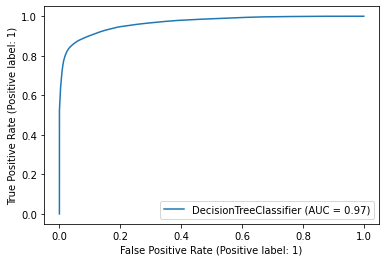

In [238]:
plot_roc_curve(treemodel_smote,X_smote,y_smote)

### Random Forest Classification for H1N1 Vaccine : 

In [409]:
RFsmote = RandomForestClassifier(n_estimators=7,max_depth=12)

In [410]:
RFmodel_smote = RFsmote.fit(X_smote,y_smote)

In [411]:
RFmodel_smote.score(X_smote,y_smote)

0.9242856463652356

In [412]:
cross_val_score(RFmodel_smote,X_smote,y_smote)

array([0.6931305 , 0.87388565, 0.94591703, 0.95304885, 0.94413408])

In [413]:
np.mean([0.6931305 , 0.87388565, 0.94591703, 0.95304885, 0.94413408])

0.8820232220000002

In [414]:
RFsmote_predict = RFmodel_smote.predict(X_smote)

In [555]:
RFsmote_predict_test = RFmodel_smote.predict(vaccinetestdf)

In [556]:
pd.DataFrame(RFsmote_predict_test).to_csv('h1h1RF.csv')

In [415]:
print(classification_report(y_smote,RFsmote_predict))

              precision    recall  f1-score   support

           0       0.90      0.95      0.93     21033
           1       0.95      0.90      0.92     21033

    accuracy                           0.92     42066
   macro avg       0.93      0.92      0.92     42066
weighted avg       0.93      0.92      0.92     42066



In [416]:
pd.crosstab(y_smote,RFsmote_predict)

col_0,0,1
h1n1_vaccine,,
0,20006,1027
1,2158,18875


C:\Users\saich\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


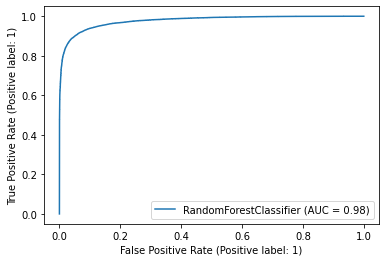

In [417]:
plot_roc_curve(RFmodel_smote,X_smote,y_smote)

### Gradient Boosting Classification for H1N1 Vaccine : 

In [457]:
gbm_smote = GradientBoostingClassifier(n_estimators=700)

In [458]:
gbmmodel_smote = gbm_smote.fit(X_smote,y_smote)

In [459]:
gbmmodel_smote.score(X_smote,y_smote)

0.9202443778823753

In [455]:
cross_val_score(gbmmodel_smote,X_smote,y_smote)

array([0.64606608, 0.8851777 , 0.96612386, 0.9656484 , 0.9630334 ])

In [456]:
np.mean([0.64606608, 0.8851777 , 0.96612386, 0.9656484 , 0.9630334 ])

0.885209888

In [460]:
gbmpredict_smote = gbmmodel_smote.predict(X_smote)

In [546]:
gbmpredict_smote_test = gbmmodel_smote.predict_proba(vaccinetestdf)

In [547]:
pd.DataFrame(gbmpredict_smote_test).to_csv('h1n1gbm.csv')

In [461]:
print(classification_report(y_smote,gbmpredict_smote))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92     21033
           1       0.95      0.88      0.92     21033

    accuracy                           0.92     42066
   macro avg       0.92      0.92      0.92     42066
weighted avg       0.92      0.92      0.92     42066



In [462]:
pd.crosstab(y_smote,gbmpredict_smote)

col_0,0,1
h1n1_vaccine,,
0,20099,934
1,2421,18612


C:\Users\saich\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


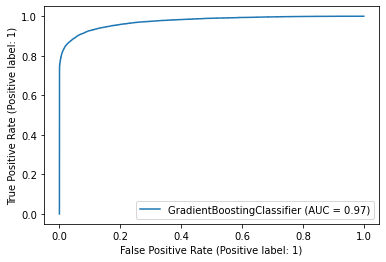

In [463]:
plot_roc_curve(gbmmodel_smote,X_smote,y_smote)

### Support Vector Classification for H1N1 Vaccine : 

In [464]:
svmmodel_smote = svm.fit(X_smote,y_smote)

In [465]:
svmmodel_smote.score(X_smote,y_smote)

0.8064470118385394

In [489]:
cross_val_score(svmmodel_smote,X_smote,y_smote)

array([0.75861659, 0.79044336, 0.81267087, 0.81564246, 0.80387496])

In [519]:
np.mean([0.75861659, 0.79044336, 0.81267087, 0.81564246, 0.80387496])

0.796249648

In [466]:
svmsmote_predict = svmmodel_smote.predict(X_smote)

In [549]:
svmsmote_predict_test = svmmodel_smote.predict(vaccinetestdf)

In [550]:
pd.DataFrame(svmsmote_predict_test).to_csv('h1n1svm.csv')

In [467]:
print(classification_report(y_smote,gbmpredict_smote))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92     21033
           1       0.95      0.88      0.92     21033

    accuracy                           0.92     42066
   macro avg       0.92      0.92      0.92     42066
weighted avg       0.92      0.92      0.92     42066



In [468]:
pd.crosstab(y_smote,gbmpredict_smote)

col_0,0,1
h1n1_vaccine,,
0,20099,934
1,2421,18612


C:\Users\saich\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


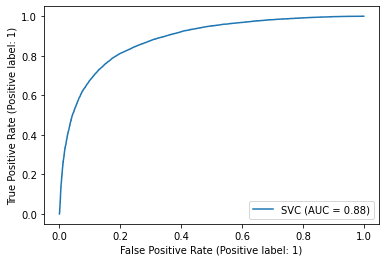

In [469]:
plot_roc_curve(svmmodel_smote,X_smote,y_smote)

### Naive Bayes Classification for H1N1 Vaccine : 

In [471]:
nbmodel_smote = nb.fit(X_smote,y_smote)

In [472]:
nbmodel_smote.score(X_smote,y_smote)

0.7696001521418723

In [478]:
cross_val_score(nbmodel_smote,X_smote,y_smote)

array([0.64606608, 0.75121835, 0.81397837, 0.81195768, 0.80744087])

In [479]:
np.mean([0.64606608, 0.75121835, 0.81397837, 0.81195768, 0.80744087])

0.76613227

In [482]:
nbsmote_predict = nbmodel_smote.predict(X_smote)

In [551]:
nbsmote_predict_test = nbmodel_smote.predict_proba(vaccinetestdf)

In [552]:
pd.DataFrame(nbsmote_predict_test).to_csv('h1n1nb.csv')

In [483]:
print(classification_report(y_smote,nbsmote_predict))

              precision    recall  f1-score   support

           0       0.78      0.75      0.76     21033
           1       0.76      0.79      0.77     21033

    accuracy                           0.77     42066
   macro avg       0.77      0.77      0.77     42066
weighted avg       0.77      0.77      0.77     42066



In [477]:
pd.crosstab(y_smote,nbsmote_predict)

col_0,0,1
h1n1_vaccine,,
0,15716,5317
1,4375,16658


In [485]:
from sklearn.metrics import RocCurveDisplay

C:\Users\saich\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


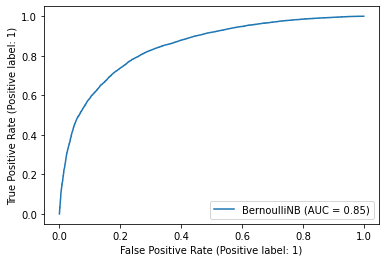

In [488]:
plot_roc_curve(nbmodel_smote,X_smote,y_smote)

# Performance Metric Report:
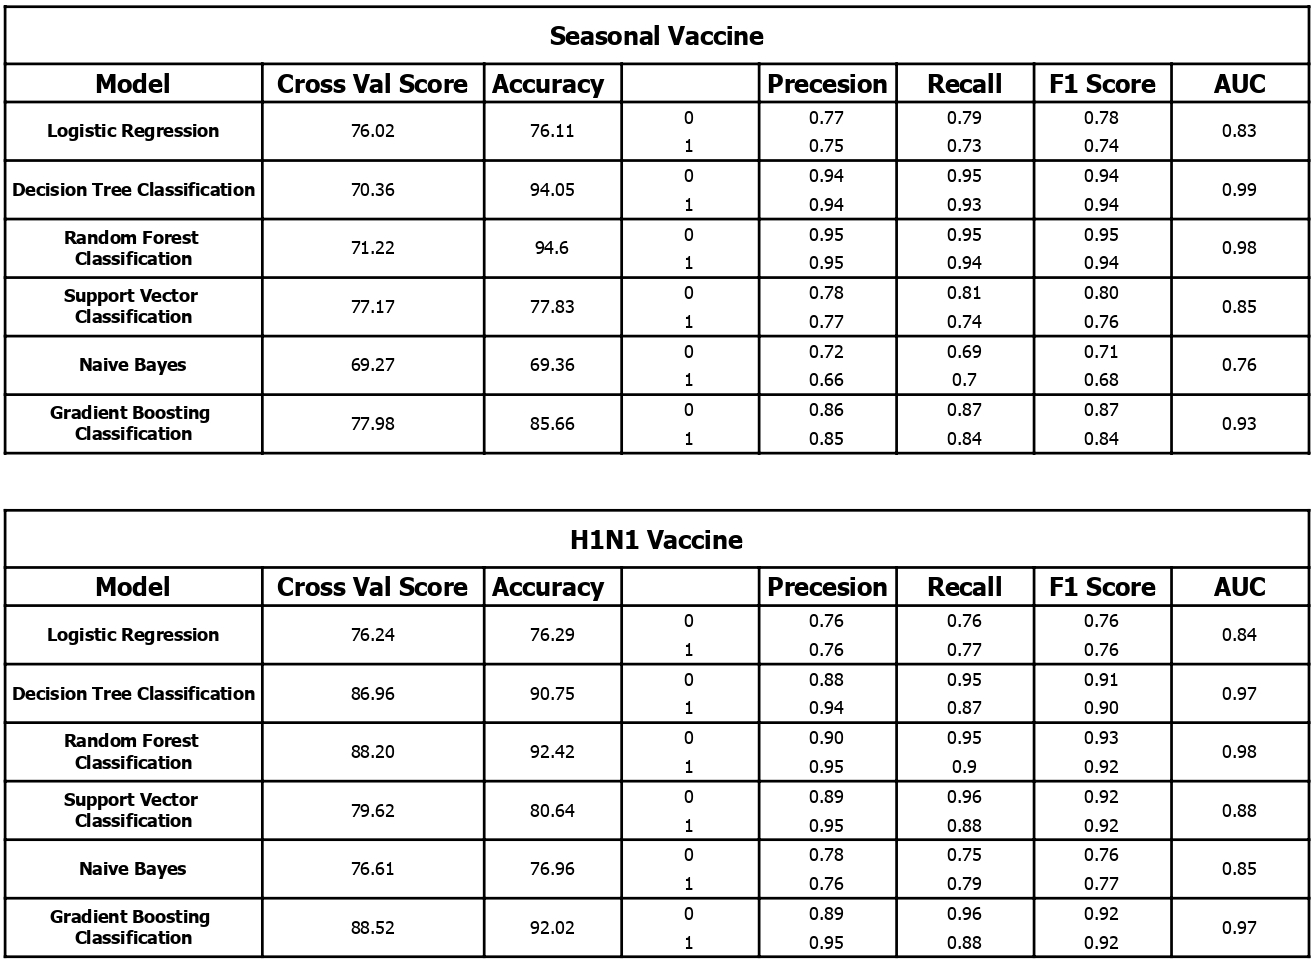

# Conclusion:

* I entered the predicted test values into the competition Flu Shot Learning: Predict H1N1 and Seasonal Flu Vaccines on the driven.org website. Of all of the models The most accurate classification method is gradient boosting with accuracy 0.7534